In [1]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import time
import datetime
from sklearn.model_selection import train_test_split

## 1. Load the datasets

For the project, we provide a training set with 50000 images in the directory `../data/images/` with:
- noisy labels for all images provided in `../data/noisy_label.csv`;
- clean labels for the first 10000 images provided in `../data/clean_labels.csv`. 

In [5]:
# [DO NOT MODIFY THIS CELL]

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))
for i in range(n_img):
    img_fn = f'../data/images/{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

# load the labels
clean_labels = np.genfromtxt('../data/clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('../data/noisy_labels.csv', delimiter=',', dtype="int8")

For illustration, we present a small subset (of size 8) of the images with their clean and noisy labels in `clean_noisy_trainset`. You are encouraged to explore more characteristics of the label noises on the whole dataset. 

Clean labels:
 frog truck truck  deer   car   car  bird horse
Noisy labels:
  cat   dog truck  frog   dog  ship  bird  deer


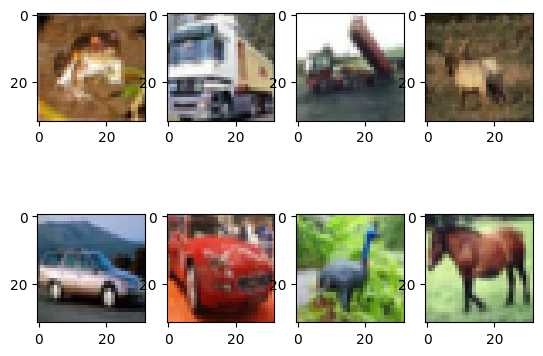

In [6]:
# [DO NOT MODIFY THIS CELL]

fig = plt.figure()

ax1 = fig.add_subplot(2,4,1)
ax1.imshow(imgs[0]/255)
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(imgs[1]/255)
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(imgs[2]/255)
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgs[3]/255)
ax1 = fig.add_subplot(2,4,5)
ax1.imshow(imgs[4]/255)
ax2 = fig.add_subplot(2,4,6)
ax2.imshow(imgs[5]/255)
ax3 = fig.add_subplot(2,4,7)
ax3.imshow(imgs[6]/255)
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgs[7]/255)

# The class-label correspondence
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# print clean labels
print('Clean labels:')
print(' '.join('%5s' % classes[clean_labels[j]] for j in range(8)))
# print noisy labels
print('Noisy labels:')
print(' '.join('%5s' % classes[noisy_labels[j]] for j in range(8)))


## 2. The predictive model

We consider a baseline model directly on the noisy dataset without any label corrections. RGB histogram features are extracted to fit a logistic regression model.

### 2.1. Baseline Model

In [7]:
# [DO NOT MODIFY THIS CELL]
# RGB histogram dataset construction
no_bins = 6
bins = np.linspace(0,255,no_bins) # the range of the rgb histogram
target_vec = np.empty(n_img)
feature_mtx = np.empty((n_img,3*(len(bins)-1)))
i = 0
for i in range(n_img):
    # The target vector consists of noisy labels
    target_vec[i] = noisy_labels[i]
    
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

In [8]:
# [DO NOT MODIFY THIS CELL]
# Train a logistic regression model 
clf = LogisticRegression(random_state=0).fit(feature_mtx, target_vec)

For the convenience of evaluation, we write the following function `predictive_model` that does the label prediction. **For your predictive model, feel free to modify the function, but make sure the function takes an RGB image of numpy.array format with dimension $32\times32\times3$  as input, and returns one single label as output.**

In [9]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

### 2.2. Model I

In [69]:
#!pip install tensorflow 

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
# [BUILD A MORE SOPHISTICATED PREDICTIVE MODEL]

# write your code here...

def model_I(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    result = model1.predict(np.array([image/255,]))
    result = np.argmax(result,axis = 1)
    return result
    

In [12]:

def create_model_I():
    model = tf.keras.models.Sequential([tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(32, (3,3),strides=1,padding="same", 
                                                               activation='tanh', input_shape=(28, 28, 1)),
                                        tf.keras.layers.MaxPooling2D((2, 2)),
                                        tf.keras.layers.Conv2D(64, (3,3),strides=1,padding="same", activation='tanh'),
                                        tf.keras.layers.MaxPooling2D((2, 2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dropout(0.8),
                                        tf.keras.layers.Dense(30, activation='relu'),
                                        tf.keras.layers.Dense(10, activation="softmax")])


    return model

In [13]:
start_time = time.time()
model1_new = create_model_I()
#compile model
#model1_new.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
model1_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model fitting
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
# model1.fit(imgs,noisy_labels,epochs = 5, validation_split =0.2,callbacks=[timer,early_stop])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history=model1_new.fit(x=imgs, 
          y=noisy_labels,
          batch_size=256,
          epochs=5, 
           validation_split =0.2, 
          callbacks=[tensorboard_callback])
print('-----Model1 run time: %s seconds-----'%(time.time()-start_time))

Epoch 1/5
157/157 [==============================] - 25s 151ms/step - loss: 2.3059 - accuracy: 0.1101 - val_loss: 2.2937 - val_accuracy: 0.1247
Epoch 2/5
157/157 [==============================] - 20s 128ms/step - loss: 2.2821 - accuracy: 0.1382 - val_loss: 2.2629 - val_accuracy: 0.1588
Epoch 3/5
157/157 [==============================] - 23s 147ms/step - loss: 2.2631 - accuracy: 0.1625 - val_loss: 2.2449 - val_accuracy: 0.1790
Epoch 4/5
157/157 [==============================] - 28s 175ms/step - loss: 2.2499 - accuracy: 0.1787 - val_loss: 2.2384 - val_accuracy: 0.1866
Epoch 5/5
157/157 [==============================] - 25s 161ms/step - loss: 2.2410 - accuracy: 0.1891 - val_loss: 2.2308 - val_accuracy: 0.1968
-----Model1 run time: 122.34153962135315 seconds-----


In [14]:
#save trained model
model1_new.save('model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [15]:
import pandas as pd

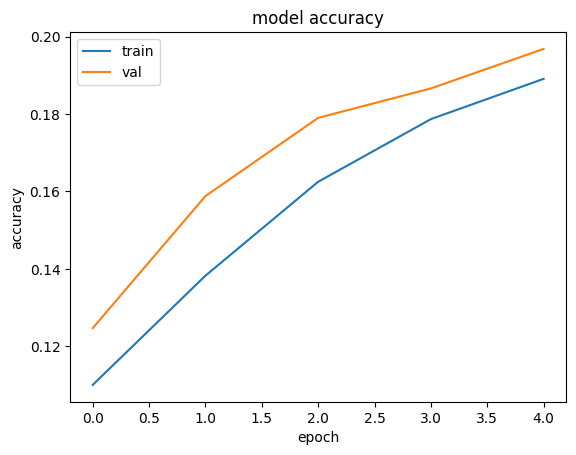

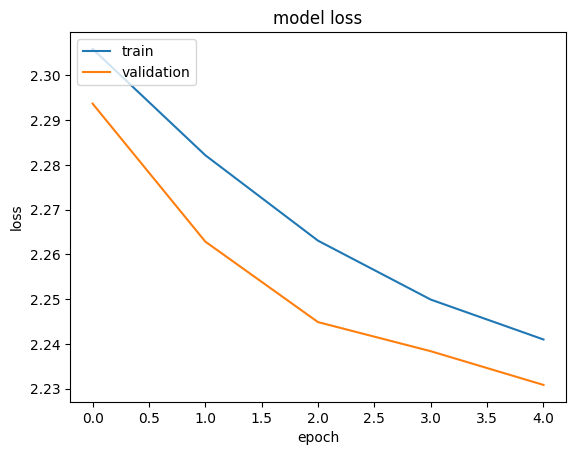

In [24]:
#### plot the acc and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2.3. Model II

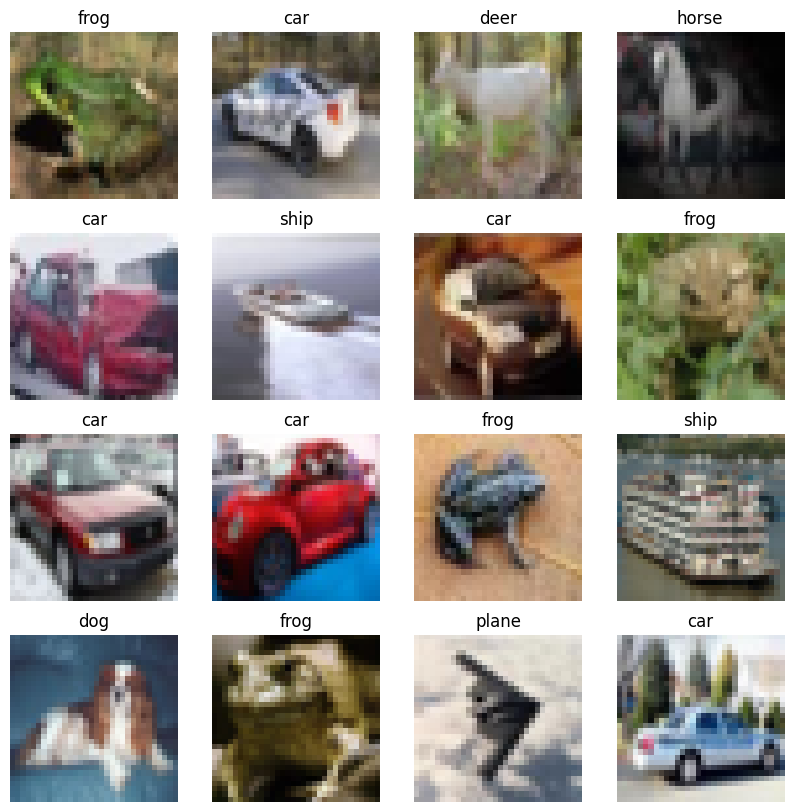

In [18]:
import matplotlib.pyplot as plt

imgs_c = imgs[:10000].reshape(-1,32,32,3)

fig, ax = plt.subplots(4,4, figsize = (10,10))
for i in range(4):
    for j in range(4):
        n = int(np.random.randint(10000, size=1))
        ax[i,j].imshow(imgs_c[n]/255)
        ax[i,j].title.set_text(classes[clean_labels[n]])
        ax[i,j].axis("off")

In [19]:
import tensorflow as tf
def label_cor():
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

        
      tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
])
    return model

In [20]:
#train based on clear data 
label_corr = label_cor()
#compile model

label_corr.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(),metrics=['accuracy'])

#model fitting
early_stop =tf.keras.callbacks.EarlyStopping(patience=3)
history21=label_corr.fit(x=imgs_c, y=clean_labels, epochs=30,batch_size=256,validation_split =0.1,callbacks=[early_stop])
print('-----label_corr run time: %s seconds-----'%(time.time()-start_time))


Epoch 1/30
36/36 [==============================] - 35s 891ms/step - loss: 1.7182 - accuracy: 0.4057 - val_loss: 3.9476 - val_accuracy: 0.2580
Epoch 2/30
36/36 [==============================] - 32s 885ms/step - loss: 1.0460 - accuracy: 0.6359 - val_loss: 1.9014 - val_accuracy: 0.3700
Epoch 3/30
36/36 [==============================] - 35s 961ms/step - loss: 0.6738 - accuracy: 0.7893 - val_loss: 1.5407 - val_accuracy: 0.4570
Epoch 4/30
36/36 [==============================] - 35s 973ms/step - loss: 0.4047 - accuracy: 0.8946 - val_loss: 1.3432 - val_accuracy: 0.5330
Epoch 5/30
36/36 [==============================] - 37s 1s/step - loss: 0.2352 - accuracy: 0.9543 - val_loss: 1.3793 - val_accuracy: 0.5310
Epoch 6/30
36/36 [==============================] - 41s 1s/step - loss: 0.1486 - accuracy: 0.9786 - val_loss: 1.3975 - val_accuracy: 0.5400
Epoch 7/30
36/36 [==============================] - 42s 1s/step - loss: 0.0985 - accuracy: 0.9881 - val_loss: 1.5284 - val_accuracy: 0.5040
-----lab

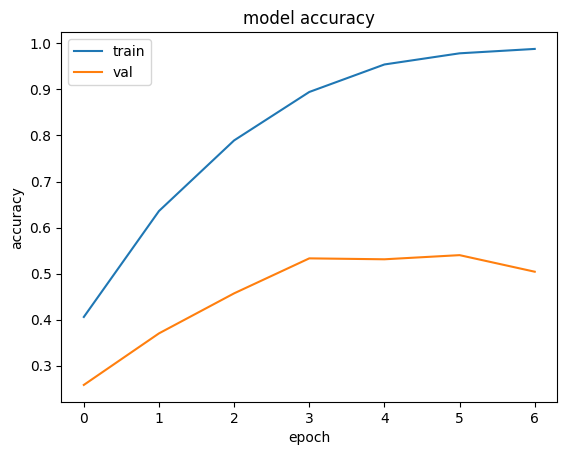

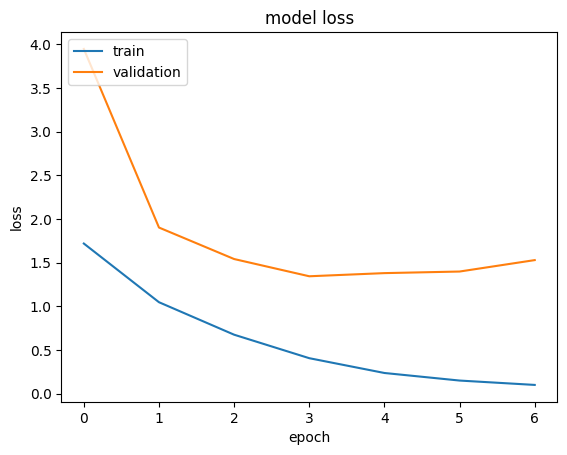

In [35]:
#### plot the acc and loss
plt.plot(history21.history['accuracy'])
plt.plot(history21.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##plot loss
plt.plot(history21.history['loss'])
plt.plot(history21.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
# [ADD WEAKLY SUPERVISED LEARNING FEATURE TO MODEL I]

# write your code here...

def model_II(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    result = model1.predict(np.array([image/255,]))
    result = np.argmax(result,axis = 1)
    return result
    

In [38]:
#create training and testing set for model
imgs_c = imgs[:10000].reshape(-1,32,32,3)
x_tr, x_te, y_tr, y_te = train_test_split(imgs_c,clean_labels,test_size=0.2,random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [40]:
#create training and testing set for model
imgs_c = imgs[:10000].reshape(-1,32,32,3)
noisy_lab = (np.array(noisy_labels[10000:])).reshape(-1,1)
x_tr, x_te, y_tr, y_te = train_test_split(imgs_c,noisy_lab[:10000],test_size=0.2,random_state=42)
x_tr = tf.cast(x_tr,dtype='float32')/255.0
x_te = tf.cast(x_te,dtype='float32')/255.0

In [41]:
#clean 40000 after pic
imgs_n = imgs[10000:].reshape(-1,32,32,3)
new_predictions = np.argmax(label_corr.predict(imgs_n),axis=1)

1250/1250 [==============================] - 28s 22ms/step


In [42]:
# #get cleaned labels
# imgs_n = imgs[10000:].reshape(-1,32,32,3)
# imgs_n = tf.cast(imgs_n,dtype='float32')/255.0
# cleaned_labels = np.argmax(label_corr.predict(imgs_n),axis=1)
labels = np.append(clean_labels,new_predictions)
#create training and testing set for modelII
#x_tr, x_te, y_tr, y_te = train_test_split(imgs,labels,test_size=0.1,shuffle=False)

In [43]:
def create_model_II():
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

        
      tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
])
    return model

In [44]:
model2= create_model_II()

In [45]:
start_time = time.time()
#compile model
model2.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(),metrics=['accuracy'])

#model fitting
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
history2=model2.fit(x=imgs, y=labels, epochs=10, validation_split =0.1,callbacks=[early_stop])

print('-----Model1 run time: %s seconds-----'%(time.time()-start_time))

Epoch 1/10
1407/1407 [==============================] - 253s 176ms/step - loss: 1.2297 - accuracy: 0.5586 - val_loss: 0.9633 - val_accuracy: 0.6452
Epoch 2/10
1407/1407 [==============================] - 255s 181ms/step - loss: 0.8645 - accuracy: 0.6905 - val_loss: 0.9883 - val_accuracy: 0.6276
Epoch 3/10
1407/1407 [==============================] - 257s 183ms/step - loss: 0.6558 - accuracy: 0.7658 - val_loss: 0.8221 - val_accuracy: 0.6970
Epoch 4/10
1407/1407 [==============================] - 254s 181ms/step - loss: 0.4652 - accuracy: 0.8358 - val_loss: 1.0169 - val_accuracy: 0.6476
Epoch 5/10
1407/1407 [==============================] - 257s 182ms/step - loss: 0.3387 - accuracy: 0.8809 - val_loss: 1.0096 - val_accuracy: 0.6686
Epoch 6/10
1407/1407 [==============================] - 260s 185ms/step - loss: 0.2546 - accuracy: 0.9115 - val_loss: 1.1625 - val_accuracy: 0.6606
-----Model1 run time: 1539.0410952568054 seconds-----


In [46]:
#save trained model
model2.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


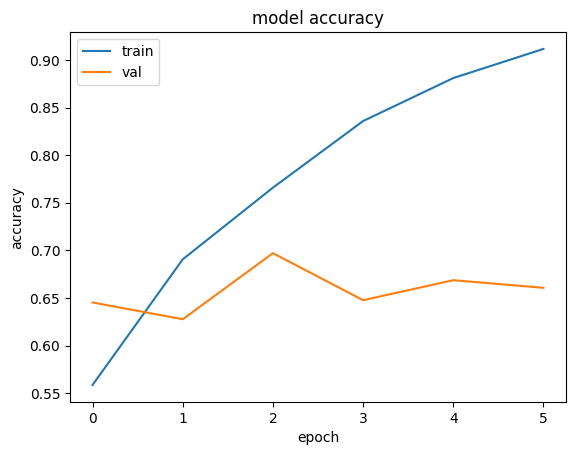

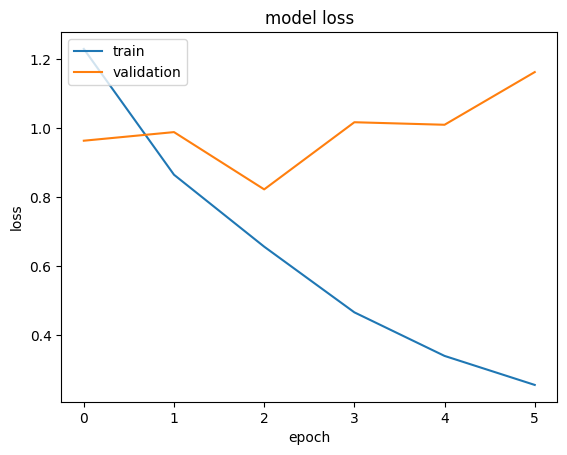

In [47]:
#### plot the acc and loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##plot loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 3. Evaluation

For assessment, we will evaluate your final model on a hidden test dataset with clean labels by the `evaluation` function defined as follows. Although you will not have the access to the test set, the function would be useful for the model developments. For example, you can split the small training set, using one portion for weakly supervised learning and the other for validation purpose. 

In [39]:
# [DO NOT MODIFY THIS CELL]
def evaluation(model, test_labels, test_imgs):
    y_true = test_labels
    y_pred = []
    for image in test_imgs:
        y_pred.append(model(image))
    print(classification_report(y_true, y_pred))

In [ ]:
# [DO NOT MODIFY THIS CELL]
# This is the code for evaluating the prediction performance on a testset
# You will get an error if running this cell, as you do not have the testset
# Nonetheless, you can create your own validation set to run the evlauation
n_test = 10000
test_labels = np.genfromtxt('../data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
evaluation(baseline_model, test_labels, test_imgs)

The overall accuracy is $0.24$, which is better than random guess (which should have a accuracy around $0.10$). For the project, you should try to improve the performance by the following strategies:

- Consider a better choice of model architectures, hyperparameters, or training scheme for the predictive model;
- Use both `clean_noisy_trainset` and `noisy_trainset` for model training via **weakly supervised learning** methods. One possible solution is to train a "label-correction" model using the former, correct the labels in the latter, and train the final predictive model using the corrected dataset.
- Apply techniques such as $k$-fold cross validation to avoid overfitting;
- Any other reasonable strategies.

In [ ]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

In [ ]:
# [DO NOT MODIFY THIS CELL]
# This is the code for evaluating the prediction performance on a testset
# You will get an error if running this cell, as you do not have the testset
# Nonetheless, you can create your own validation set to run the evlauation
n_test = 10000
test_labels = np.genfromtxt('../data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
evaluation(baseline_model, test_labels, test_imgs)

In [ ]:
#generate classification report
##1. baseline
feature_mtx_pred = np.empty((10000,3*(len(bins)-1)))
for i in range(10000):
   
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(test_imgs[i][:,:,0],bins=bins)[0]
    feature2 = np.histogram(test_imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(test_imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx_pred[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

pred_base = clf.predict(feature_mtx_pred)

report_base = classification_report(test_labels,pred_base)
print('---------baseline_model classification report----------')
print(report_base)

#model 1
model1_pred = tf.keras.models.load_model('model1')
pred_1 = model1_pred.predict(test_imgs)
pred_1 = np.argmax(pred_1,axis=-1)

report_1 = classification_report(test_labels,pred_1)
print('---------model1 classification report----------')
print(report_1)

#model 2
model2_pred = tf.keras.models.load_model('model2')
pred_2 = model2_pred.predict(test_imgs)
pred_2 = np.argmax(pred_2,axis=-1)
report_2 = classification_report(test_labels,pred_2)
print('---------model 2 classification report----------')
print(report_2)

In [ ]:
#generate prediction for models and export csv file
output_df = pd.DataFrame()

#baseline
feature_mtx_pred = np.empty((10000,3*(len(bins)-1)))
for i in range(10000):
   
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(test_imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(test_imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(test_imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx_pred[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

pred_base = clf.predict(feature_mtx_pred)
pred_base = clf.predict(feature_mtx_pred)
#model1
model1_pred = tf.keras.models.load_model('model1')
pred_1 = model1_pred.predict(test_imgs)
pred_1 = np.argmax(pred_1,axis=-1)
#model 2
model2_pred = tf.keras.models.load_model('model2')
pred_2 = model2_pred.predict(test_imgs)
pred_2 = np.argmax(pred_2,axis=-1)

index_vals = np.arange(10000)
output_df = pd.DataFrame(index=index_vals)
output_df['baseline_pred'] = pred_base
output_df['modelI_pred'] = pred_1
output_df['modelII_pred'] = pred_2
output_df.to_csv('label_prediction.csv')





## 4. Report
Below is a brief report that summarizes the development of an image classification AI model to address the limitations of a client's existing approach.

### 4.1 Problem statement

The objective of this project is to develop an image classification AI model that effectively addresses the limitations of the client's current practice, which relies on simple logistic regression and assumes clean labels. The new model must be sophisticated enough to handle the given dataset of 50,000 images with noisy labels and an additional 10,000 images with cleaned labels, while maintaining a balance between memory cost and running time cost. The model should be capable of learning from potentially untrustworthy sources and providing accurate classification results. The end goal is to deliver a robust, efficient, and scalable solution that surpasses the performance of the client's existing logistic regression-based approach for their image classification needs.

### 4.2  Baseline model (Client’s model) 

The client's baseline model employs logistic regression, a linear model that utilizes a single linear boundary to distinguish classes in the feature space, while treating noisy labels as clean labels. This simple and interpretable model is effective for clean, linearly separable datasets. However, logistic regression has inherent limitations in capturing complex relationships between input features and is potentially inadequate for handling datasets with noise and non-linear decision boundaries. Consequently, this approach may not yield optimal performance in the context of the client's mixed dataset, which includes noisy and cleaned labels.

### 4.3 Model I

We propose Model I, a Convolutional Neural Network (CNN), as an alternative to the logistic regression-based baseline model. Model I utilizes all 50k images and 50k noisy labels, treating them as clean data during training. The architecture includes a batch normalization layer, two CNN layers with Conv2D and MaxPooling2D, a Flatten layer, a Dropout layer, and two Dense layers with ReLU and softmax activations. The model is fitted using an 80% training and 20% validation split, with the Adam optimizer, sparse categorical cross-entropy loss function, and an early stopping callback to prevent overfitting.

In comparison to the baseline logistic regression model, Model I is a deep learning approach that can learn more complex representations of images, automatically extract features, and classify images more accurately. However, this model does not incorporate weakly supervised learning features and treats noisy data as clean data during training.

The performance of Model I shows a slight improvement in accuracy over the baseline model, with around 20% accuracy on both the training and validation sets. Despite this improvement, the classification results are still not ideal. The runtime for Model I is around 120 seconds, indicating its potential to be optimized further. 

<figure>
  <img src="https://raw.githubusercontent.com/Enzoherewj/desktop-tutorial/main/figs/fig1_model1.jpg" width="600" height="400">
  <figcaption style="text-align: center;">Figure 1: model trained with 50k noisy labels.</figcaption>
</figure>


### 4.4 Model II

Model II, an improved Convolutional Neural Network (CNN), is designed to address the limitations of the baseline model and Model I. The architecture consists of two CNN layers with 128(1) and 64(2) 2x2 filters, ReLU activation, 10% dropout, and batch normalization. It also includes a Flatten layer, a Dense layer with ReLU activation, another Dropout layer, a BatchNormalization layer, and a final Dense layer with softmax activation.

For training, Model II uses a weakly supervised learning approach, leveraging 50k images and 10k cleaned labels. Initially, the CNN is trained with the first 10k images and their corresponding clean labels. This model then predicts clean labels for the remaining 40k images with noisy labels. The model is subsequently retrained using the original 10k clean labels and 40k corrected labels, with a 90% training and 10% validation split, Nadam optimizer, sparse categorical cross-entropy loss function, and an early stopping callback. 


<figure>
  <img src="https://raw.githubusercontent.com/Enzoherewj/desktop-tutorial/main/figs/fig2_model2_1.jpg" width="600" height="400">
  <figcaption style="text-align: center;">Figure 2: model trained with 10k clean labels.</figcaption>
</figure>

<figure>
  <img src="https://raw.githubusercontent.com/Enzoherewj/desktop-tutorial/main/figs/fig3_model2_2.jpg" width="600" height="400">
  <figcaption style="text-align: center;">Figure 3: model trained with 10k clean labels and 40k corrected labels.</figcaption>
</figure>

Model II demonstrates superior performance compared to the baseline model and Model I. When trained with 10k clean labels, it achieves 99% training accuracy and 50% validation accuracy. After retraining with the 10k clean labels and 40k corrected labels, the model's performance improves to 88% training accuracy and 65% validation accuracy, with a runtime of around 1200 seconds.

This improved model benefits from more accurate training data, a more complex architecture, and the use of regularization techniques such as dropout and batch normalization. These enhancements enable Model II to learn complex, non-linear relationships between input and output, leading to better overall performance.


### 4.5 Conclusions and Recommendations

In conclusion, Model II, with its more complex CNN architecture, regularization techniques, and a combination of clean and predicted labels for training, has proven to be superior to both the baseline logistic regression model and the simpler CNN architecture of Model I in image classification tasks. Although Model II has a longer running time compared to Model I, it significantly outperforms Model I in terms of accuracy, striking a balance between running time cost and accuracy given the large volume of data.

For future improvements, we recommend exploring hyperparameter tuning through techniques such as grid-search to test different learning rates, batch sizes, and dropout rates, which can further optimize the model and enhance its performance. Additionally, ensemble learning, which combines multiple models (e.g., Model II with other CNN architectures), can be employed to improve the model's accuracy and robustness.
